# Задание 3
Реализовать и использовать степенной метод для вычисления наибольшего или наименьшего по величине собственного значения.

## Теория

### Метод степеней

Метод степеней заключается в следующем. Мы хотим найти наибольшее по абсолютной величине собственное значение $\lambda$ матрицы $A$ и соответствующий собственный вектор $V$.
Возьмем начальный вектор $X_0 = (1,1,\cdots,1)$ (можно брать случайным). Сгенерируем последовательность $\{X_k\}$ используя соотношения:
$$
\begin{matrix}
Y_k = AX_k, \\
X_{k+1}=\frac{1}{c_{k+1}}Y_k,
\end{matrix}
$$
где $c_{k+1}$ -- наибольшая по величине координата вектора $Y_k$ ($c_{k+1} = |v_j|=\max_{v_i\in V, 1\leq i\leq n}|v_i|$). Утверждается, что посл-сти $\{X_k\}$ и $\{c_k\}$ сходятся:
$$\begin{matrix}
\lim\limits_{k\to\inf}X_k=V, & \lim\limits_{k\to\inf}c_k=\lambda.
\end{matrix}$$
Док-во сходимости строится на разложении вектора $X$ по собственным векторам матрицы $A$:
$$\begin{matrix}
X = b_1V_1 + b_2V_2 + \cdots + b_nV_n, \\
Y = \frac{\lambda_1^k}{c_1c_2\cdots c_k}\left(b_1V_1 + b_2\left(\frac{\lambda_2}{\lambda_1}\right)^k V_2 + \cdots + b_n\left(\frac{\lambda_n}{\lambda_1}\right)^k V_n\right),
\end{matrix}$$
И так как $\lambda_1$ является мажорижующим собственным значением, то: $$\left(\frac{\lambda_i}{\lambda_1}\right)^k\to 0.$$
Более подробно можно почитать ''Mathews_Fink_2001ru-3rd'', 610 стр.

## Код

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Реализуем метод

In [2]:
# Метод взял из английской вики
def power_iteration(A: np.array, num_iterations: int):
    """Finding the largest eigenvalue and corresponding
    eigenvector by iterating

    Keywoed arguments:
    A -- input array
    num_iterations -- number of iterations
    """
    x_list = []
    lambda_list = []

    x_k = np.ones(A.shape[1])
    # x_k = np.random.rand(A.shape[1]) is an alternative
    x_list.append(x_k)

    for _ in range(num_iterations):
        # calculate the matrix-by-vector product Ab
        y_k = np.dot(A, x_k)

        # calculate the norm
        x_k1_norm = np.max(np.abs(y_k))
        lambda_list.append(x_k1_norm)
        # x_k1_norm = np.linalg.norm(y_k) is an alternative

        # re normalize the vector
        x_k = y_k / x_k1_norm
        x_list.append(x_k)

    return np.array(x_list), np.array(lambda_list)

### Задаем матрицу и применяем степенной метод

In [3]:
A = np.array([[ 0, 11, -5],
              [-2, 17, -7],
              [-4, 26, -10]])

In [4]:
num_iterations = 20

In [5]:
eigenvectors, eigenvalues = power_iteration(A, num_iterations)
print(f'{eigenvectors[-1]=}')
print(f'{eigenvalues[-1]=}')

eigenvectors[-1]=array([0.40000011, 0.60000008, 1.        ])
eigenvalues[-1]=4.000003051762464


### Строим графики, смотрим сходимости

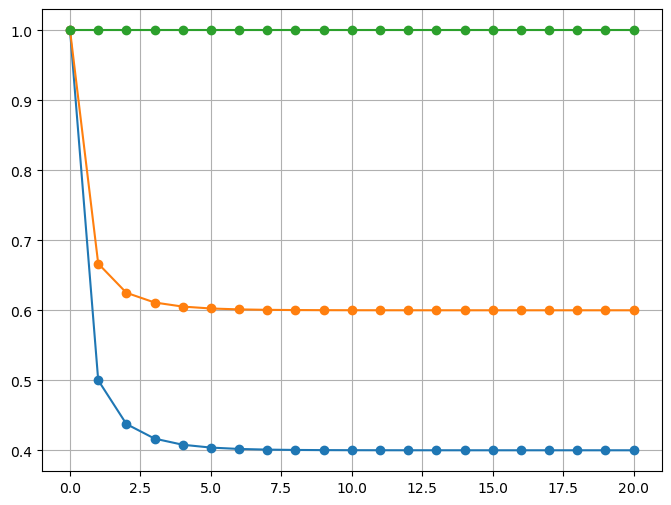

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

for coeffs in eigenvectors.T:
    ax.plot(np.linspace(0, num_iterations, num_iterations+1), 
            coeffs, marker = 'o')
ax.grid()

plt.show()

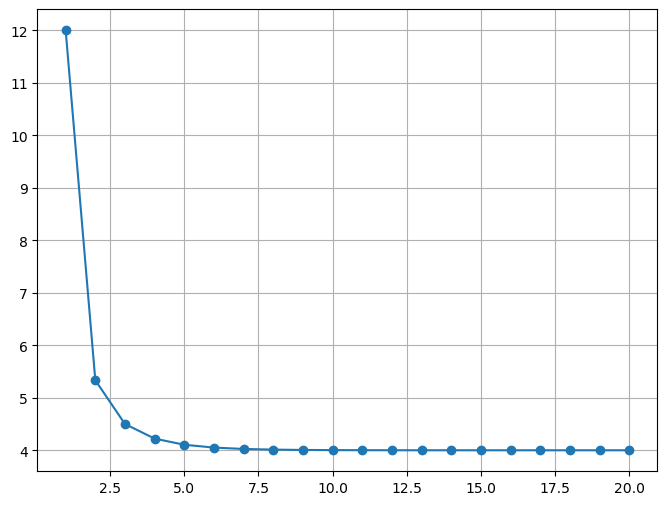

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

ax.plot(np.linspace(1, num_iterations, num_iterations), 
            eigenvalues, marker = 'o')
ax.grid()

plt.show()